# Analyzing Dataset of the Movie Industry from Kaggle

### OBJECTIVE

- Analyze the dataset and come up the factors affecting gross earnings the most.
- Give the names of top Revenue generating companies.

Also generate any other insights which could be useful for decision-making in the industry.

In [220]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure


matplotlib.rcParams['figure.figsize']=(12,8)        

##### LOADING THE DATA

In [221]:
# getting data
df = pd.read_csv(r"C:\Users\91978\OneDrive\Desktop\portfolio project\python\movies.csv\movies.csv")

In [222]:
# inspect the dataset and its structure
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


##### DATA DESCRIPTION

- This data was scraped from IMDb. Each movie has the following attributes:

`budget`: the budget of a movie. Some movies don't have this, so it appears as 0              <br>
`company`: the production company        <br>
`country`: country of origin            <br>
`director`: the director               <br> 
`genre`: main genre of the movie          <br>
`gross`: revenue of the movie            <br>
`name`: name of the movie                 <br>
`rating`: rating of the movie (R, PG, etc.)    <br>
`released`: release date                <br>
`runtime`: duration of the movie            <br>
`score`: IMDb user rating            <br>
`votes`: number of user votes           <br>
`star`: main actor/actress                <br>
`writer`: writer of the movie              <br>
`year`: year of release

In [223]:
# looking at the details like number of rows, number of columns, datatypes,null values, memory used etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [224]:
df.shape

(7668, 15)

In [225]:
# getting names of columns
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [226]:
# descriptive statistics of the data
df.describe()

,year,score,votes,budget,gross,runtime
count,7668.000000,7665.000000,7.665000e+03,5.497000e+03,7.479000e+03,7664.000000
mean,2000.405451,6.390411,8.810850e+04,3.558988e+07,7.850054e+07,107.261613
std,11.153508,0.968842,1.633238e+05,4.145730e+07,1.657251e+08,18.581247
min,1980.000000,1.900000,7.000000e+00,3.000000e+03,3.090000e+02,55.000000
25%,1991.000000,5.800000,9.100000e+03,1.000000e+07,4.532056e+06,95.000000
50%,2000.000000,6.500000,3.300000e+04,2.050000e+07,2.020576e+07,104.000000
75%,2010.000000,7.100000,9.300000e+04,4.500000e+07,7.601669e+07,116.000000
max,2020.000000,9.300000,2.400000e+06,3.560000e+08,2.847246e+09,366.000000


From the above we can see that,
- the data covers a period from 1980 till 2020
- has a minimum score of 1.9 and a maximum score of 9.3
- and the average film run is 107 minutes.

### DATA CLEANING

##### INCONSISTENT DATA

In [227]:
np.sort(pd.unique(df['rating'].astype(str).values))

array(['Approved', 'G', 'NC-17', 'Not Rated', 'PG', 'PG-13', 'R', 'TV-14',
       'TV-MA', 'TV-PG', 'Unrated', 'X', 'nan'], dtype=object)

- we have two different values `Not Rated` and `Unrated`, when we know that these two are actually the same. So we unify it.

In [228]:
df.loc[df['rating'].astype(str).str.contains('Not Rated'), 'rating'] = 'Unrated'

In [229]:
df.rating.unique()

array(['R', 'PG', 'G', nan, 'Unrated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'X', 'TV-MA', 'TV-14'], dtype=object)

##### MISSING VALUES

In [230]:
# percentage of missing values in each column
df.isnull().sum() / len(df) *100

name         0.000000
rating       1.004173
genre        0.000000
year         0.000000
released     0.026082
score        0.039124
votes        0.039124
director     0.000000
writer       0.039124
star         0.013041
country      0.039124
budget      28.312467
gross        2.464789
company      0.221701
runtime      0.052165
dtype: float64

##### Since only two films are missing the release date, we look up the information online and fill it in to make it easier for the algorithm to convert the release_year.

In [231]:
df[df.released.isnull()]

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5728,Saw: The Final Chapter,R,Crime,2010,NaN,5.6,93000.0,Kevin Greutert,Patrick Melton,Tobin Bell,NaN,NaN,NaN,NaN,NaN
5730,The Wolfman,R,Drama,2010,NaN,5.8,104000.0,Joe Johnston,Andrew Kevin Walker,Benicio Del Toro,NaN,NaN,NaN,NaN,NaN


In [232]:
df.loc[df['name'].isin(pd.Series(['Saw: The Final Chapter'])),'released']='October 29, 2010 (United States)'
df.loc[df['name'].isin(pd.Series(['The Wolfman'])),'released']='February 12, 2010 (United States)'

In [233]:
#cross checking null values in 'released' column
df['released'].isnull().sum()

0

##### For now, we keep most of the missing values except, replacing null values with zero in 'budget' and 'gross' for better analysis

In [234]:
df['budget'] = df['budget'].fillna(0)
df['gross'] = df['gross'].fillna(0)

In [235]:
#cross check null values

df.isnull().sum()

name         0
rating      77
genre        0
year         0
released     0
score        3
votes        3
director     0
writer       3
star         1
country      3
budget       0
gross        0
company     17
runtime      4
dtype: int64

In [236]:
# changing the data type

df.budget.astype('int64')

df.gross.astype('int64').head()

0     46998772
1     58853106
2    538375067
3     83453539
4     39846344
Name: gross, dtype: int64

##### Year column

In [237]:
# we see that the year column is actually the release date 
#but the data populated in the column is inconsistent with the released column

#so changing the column 'year'by taking its values from the released column itself

df['year'] = df.released.astype(str).str.split(', ', expand=True)[1].str[:4]
df.year.head()

0    1980
1    1980
2    1980
3    1980
4    1980
Name: year, dtype: object

In [238]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


##### Duplicates?

In [239]:
df.duplicated().sum()

0

In [240]:
# no duplicates found

In [241]:
# dropping duplicates if found

df.drop_duplicates()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7663,More to Life,NaN,Drama,2020,"October 23, 2020 (United States)",3.1,18.0,Joseph Ebanks,Joseph Ebanks,Shannon Bond,United States,7000.0,0.0,NaN,90.0
7664,Dream Round,NaN,Comedy,2020,"February 7, 2020 (United States)",4.7,36.0,Dusty Dukatz,Lisa Huston,Michael Saquella,United States,0.0,0.0,Cactus Blue Entertainment,90.0
7665,Saving Mbango,NaN,Drama,2020,"April 27, 2020 (Cameroon)",5.7,29.0,Nkanya Nkwai,Lynno Lovert,Onyama Laura,United States,58750.0,0.0,Embi Productions,NaN
7666,It's Just Us,NaN,Drama,2020,"October 1, 2020 (United States)",NaN,NaN,James Randall,James Randall,Christina Roz,United States,15000.0,0.0,NaN,120.0


### ANALYSIS

In [242]:
# ordering data

df.sort_values('gross', inplace = False, ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0


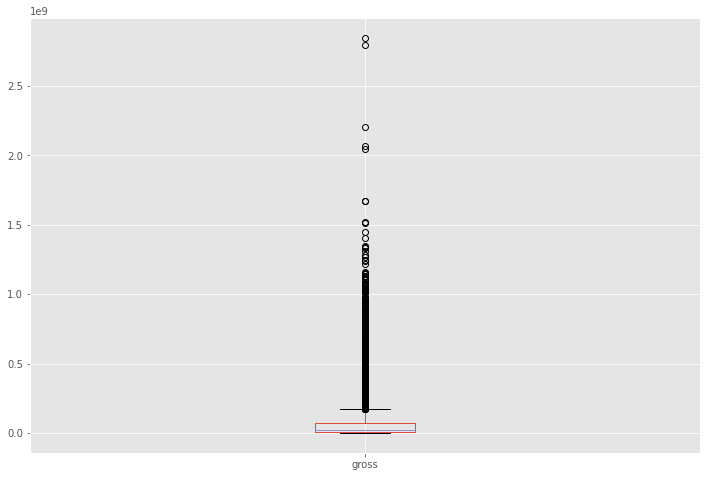

In [243]:
# Outliers in Gross Earnings?

df.boxplot(column=['gross'])
plt.show()

In [244]:
# finding correlation

#pearson is also the default method 
df.corr(method='pearson')

,score,votes,budget,gross,runtime
score,1.000000,0.409182,0.055665,0.186392,0.399451
votes,0.409182,1.000000,0.486862,0.632834,0.309212
budget,0.055665,0.486862,1.000000,0.750157,0.269510
gross,0.186392,0.632834,0.750157,1.000000,0.245235
runtime,0.399451,0.309212,0.269510,0.245235,1.000000


**From the above we can see that Gross Earnings have a high positive correlation with the budget and votes.** <br>
Score has the least positive correlation with Gross Earnings.  <br>
Lets use various plots to verify it.

**Correlation between Votes and Gross Earnings**

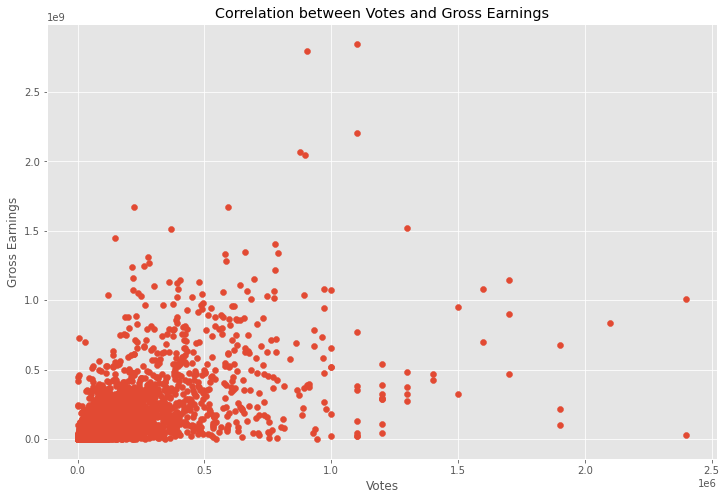

In [245]:
## Correlation between Votes and Gross Earnings
# scatterplot to verify it

plt.scatter(x=df['votes'], y=df['gross'])
plt.title('Correlation between Votes and Gross Earnings')
plt.xlabel('Votes')
plt.ylabel('Gross Earnings')
plt.show()

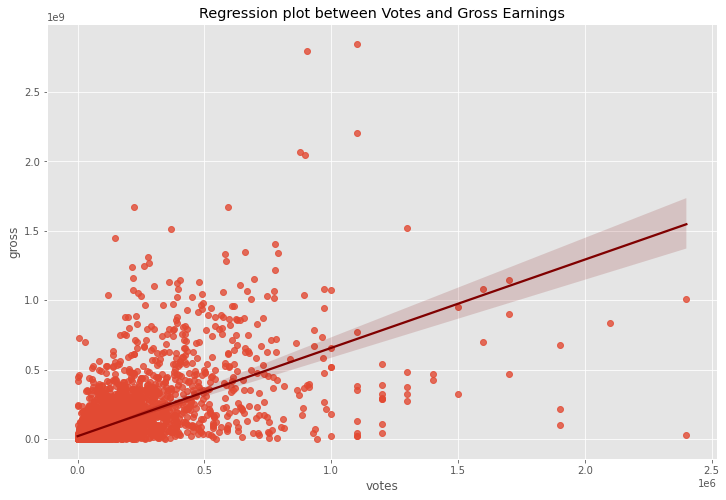

In [246]:
#regression plot 

sns.regplot(x='votes', y='gross', data=df, line_kws = {'color': 'maroon'})
plt.title('Regression plot between Votes and Gross Earnings')
plt.show()

**Correlation between Budget and Gross Earnings**

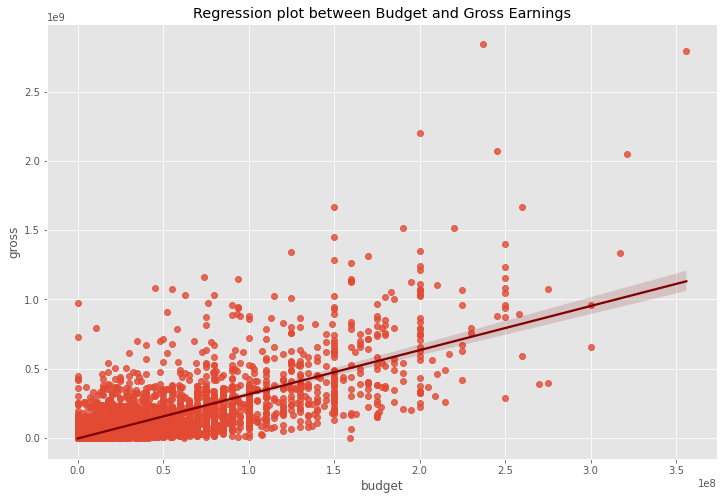

In [247]:
# Budget and Gross Earnings

#regression plot

sns.regplot(x='budget', y='gross', data=df, line_kws = {'color': 'maroon'})
plt.title('Regression plot between Budget and Gross Earnings')
plt.show()

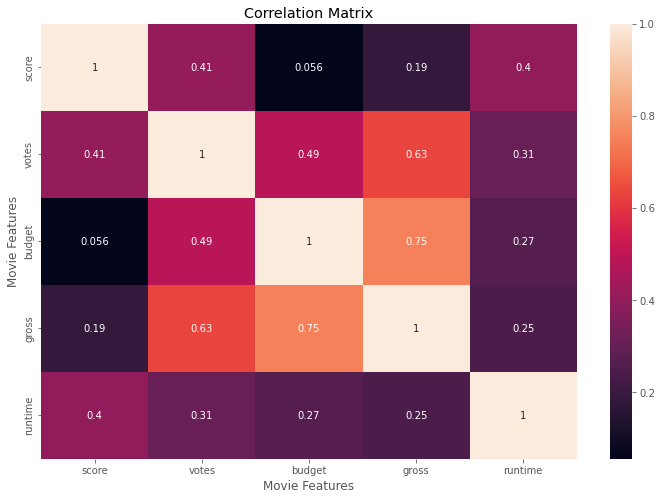

In [248]:
#heatmap - uses only numeric variables

sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

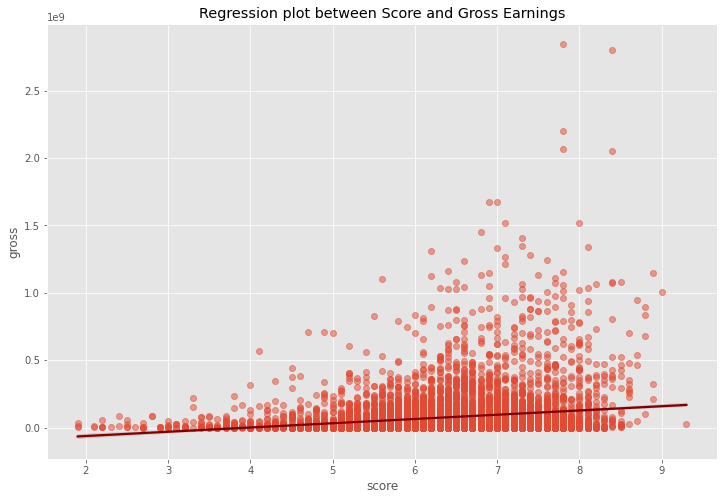

In [249]:
# Score and Gross Earnings

sns.regplot(x="score", y="gross", data=df, scatter_kws={'alpha':0.5}, line_kws = {'color': 'maroon'})
plt.title('Regression plot between Score and Gross Earnings')
plt.show()

**We can see very clearly that there is indeed a high positive correlation between Budget and Gross Earnings!🤓** <br>
**And also there is a positive correlation between Votes and Gross Earnings.**

In [250]:
# the other methods of correlation also show positive correlation between the studied variables
# but we will follow pearson's method, which is also the standard correlation coefficient

In [251]:
# correlation 

df.corr(method = 'kendall')

,score,votes,budget,gross,runtime
score,1.000000,0.300115,-0.005194,0.090626,0.283611
votes,0.300115,1.000000,0.439902,0.560118,0.198240
budget,-0.005194,0.439902,1.000000,0.541956,0.176016
gross,0.090626,0.560118,0.541956,1.000000,0.176912
runtime,0.283611,0.198240,0.176016,0.176912,1.000000


In [252]:
# correlation 

df.corr(method = 'spearman')

,score,votes,budget,gross,runtime
score,1.000000,0.428138,-0.007500,0.132569,0.399857
votes,0.428138,1.000000,0.604627,0.752265,0.290159
budget,-0.007500,0.604627,1.000000,0.716816,0.246748
gross,0.132569,0.752265,0.716816,1.000000,0.256783
runtime,0.399857,0.290159,0.246748,0.256783,1.000000


##### The methods used till now study only the numeric variables, but we can study the correlations with categorical variables also

In [253]:
# converting the object datatypes into numerical values
new_df = df.copy()
for col in new_df.columns:
    if new_df[col].dtype == 'object':
        new_df[col] = new_df[col].astype('category')
        new_df[col] = new_df[col].cat.codes

In [254]:
new_df .head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,6587,5,6,0,1705,8.4,927000.0,2589,4014,1047,54,19000000.0,46998772.0,2319,146.0
1,5573,5,1,0,1492,5.8,65000.0,2269,1632,327,55,4500000.0,58853106.0,731,104.0
2,5142,3,0,0,1771,8.7,1200000.0,1111,2567,1745,55,18000000.0,538375067.0,1540,124.0
3,286,3,4,0,1492,7.7,221000.0,1301,2000,2246,55,3500000.0,83453539.0,1812,88.0
4,1027,5,4,0,1543,7.3,108000.0,1054,521,410,55,6000000.0,39846344.0,1777,98.0


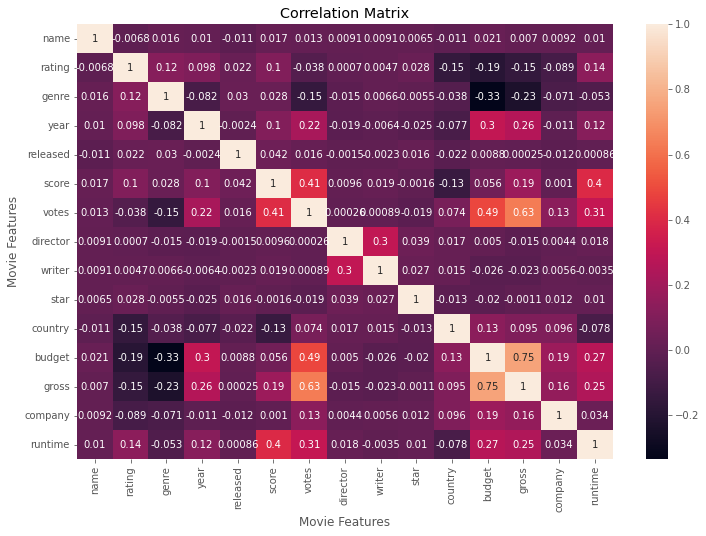

In [255]:
#heatmap

sns.heatmap(new_df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

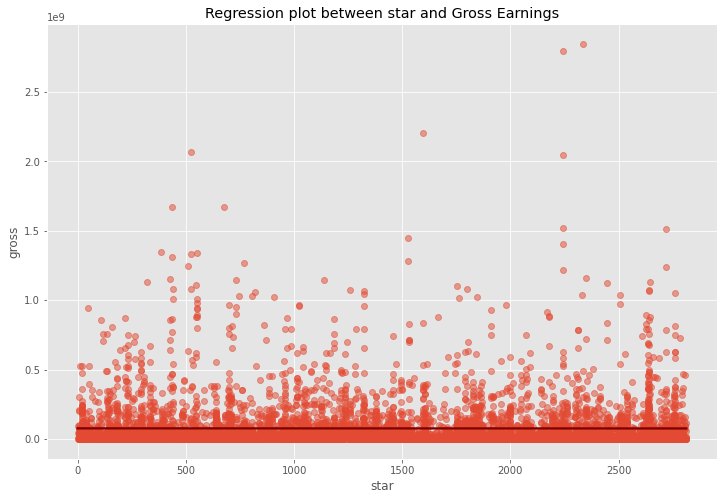

In [256]:
sns.regplot(x="star", y="gross", data=new_df, scatter_kws={'alpha':0.5}, line_kws = {'color': 'maroon'})
plt.title('Regression plot between star and Gross Earnings')
plt.show()

In [257]:
# we can draw various conclusion like:
#the name of the movie, released date,stars it had casted, the company had the least or no correlation with Gross Earnings
# some of which might have have been contrary to what we would have thought like that for star, company etc.

**Reducing the number of variables, to the ones having high positive correlation**

In [258]:
corr_pairs = new_df.corr().unstack().sort_values()
corr_pairs

genre    budget    -0.334021
budget   genre     -0.334021
gross    genre     -0.234297
genre    gross     -0.234297
budget   rating    -0.188934
                      ...   
year     year       1.000000
genre    genre      1.000000
rating   rating     1.000000
company  company    1.000000
runtime  runtime    1.000000
Length: 225, dtype: float64

In [259]:
corr_pairs[(corr_pairs) > 0.5]

gross     votes       0.632834
votes     gross       0.632834
gross     budget      0.750157
budget    gross       0.750157
name      name        1.000000
director  director    1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
writer    writer      1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
year      year        1.000000
genre     genre       1.000000
rating    rating      1.000000
company   company     1.000000
runtime   runtime     1.000000
dtype: float64

In [260]:
# Very clearly we can see that Votes and Budget have the positive correlation with Gross Earnings, amongst all the variables.


# LOOKING AT SOME TRENDS

We will look whether there were any changes in budget and gross between 1980-2020.

In [261]:
# aggregating the data and grouping it by release_year
df_aggregated = df.groupby(df['year']).agg({'budget': ['sum'], 'gross': ['sum'], 'name': ['count']})

df_aggregated.head()

,budget,gross,name
,sum,sum,count
year,,,
1980,4.117500e+08,2.329358e+09,79
1981,7.216000e+08,2.253569e+09,102
1982,8.568500e+08,3.440353e+09,126
1983,9.003906e+08,2.704427e+09,143
1984,1.137476e+09,3.631823e+09,156


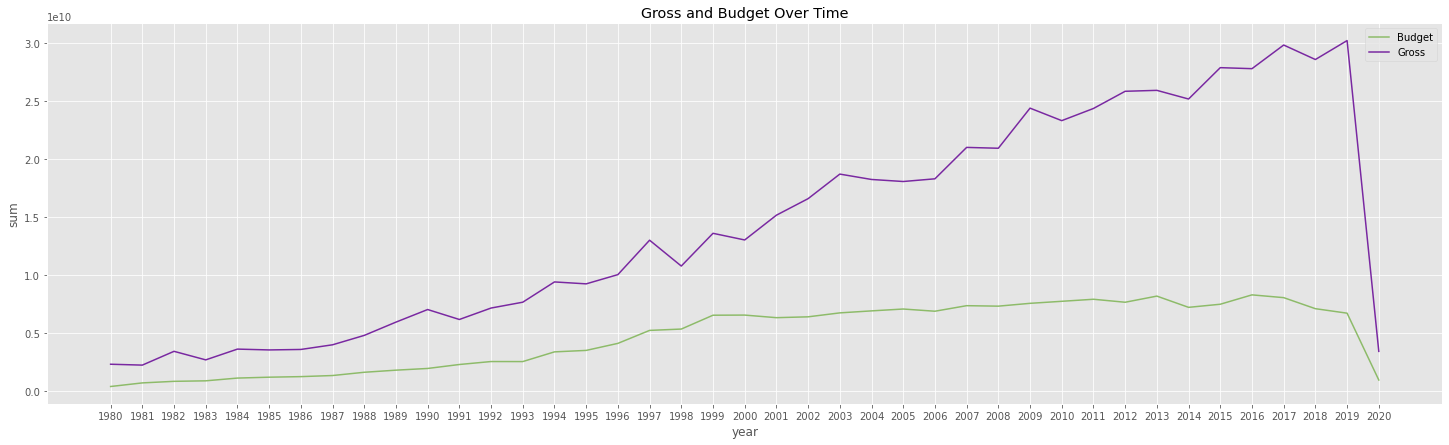

In [262]:
# plotting the trends
plt.figure(figsize=(25,7))
sns.lineplot(x='year', y=df_aggregated['budget']['sum'],data=df_aggregated, color='#8dbb69')
sns.lineplot(x='year', y=df_aggregated['gross']['sum'], data=df_aggregated, color="#7928a1")
plt.title('Gross and Budget Over Time')
plt.legend(labels=["Budget","Gross"])
plt.show()

It looks like there was a consistent growth in the movie industry for most part.

### ARE SOME GENRES MORE PROFITABLE?

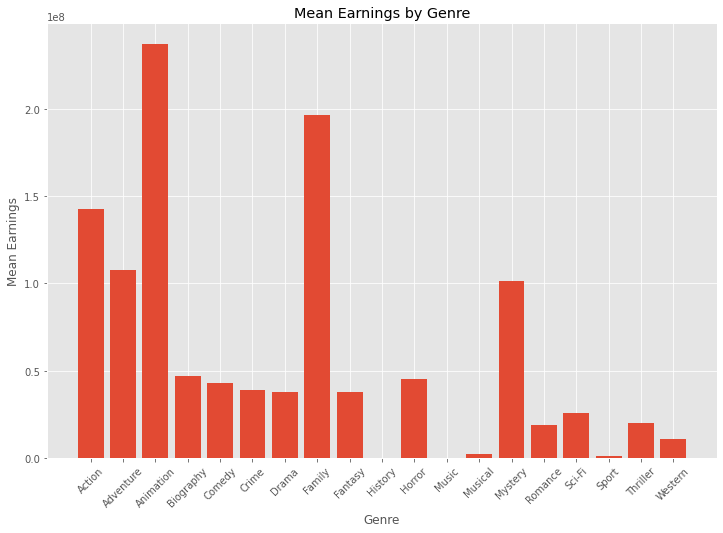

In [263]:
earnings_by_genre = df.groupby('genre')['gross'].mean()

# Create a bar plot
plt.bar(earnings_by_genre.index, earnings_by_genre.values)
plt.title('Mean Earnings by Genre')
plt.xlabel('Genre')
plt.ylabel('Mean Earnings')
plt.xticks(rotation=45)

# Show the plot
plt.show()

##### A simple bar plot above helps us see that some genres are clearly more profitable than the others like animation, family and action. On the other hand genres like history and music generate very less revenue.

### Looking at the top 15 compaies by gross revenue

In [264]:
Co_GrossEarning = df.groupby('company')['gross'].sum().astype('int64')
top15 = Co_GrossEarning.sort_values(ascending=False)[:15]
top15

company
Warner Bros.                 56491421806
Universal Pictures           52514188890
Columbia Pictures            43008941346
Paramount Pictures           40493607415
Twentieth Century Fox        40257053857
Walt Disney Pictures         36327887792
New Line Cinema              19883797684
Marvel Studios               15065592411
DreamWorks Animation         11873612858
Touchstone Pictures          11795832638
Dreamworks Pictures          11635441081
Metro-Goldwyn-Mayer (MGM)     9230230105
Summit Entertainment          8373718838
Pixar Animation Studios       7886344526
Fox 2000 Pictures             7443502667
Name: gross, dtype: int64

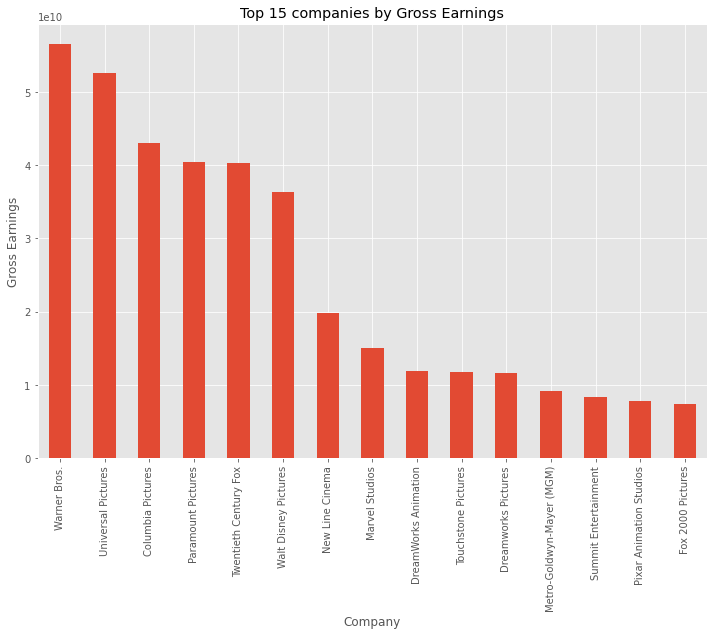

In [265]:
top15.plot(kind='bar')
plt.title('Top 15 companies by Gross Earnings')
plt.xlabel('Company')
plt.ylabel('Gross Earnings')
plt.show()

### Analyzing the dataset of Movie Industry helped us see interesting insights of the industry

* We could see that top factors contributing to Gross Earnings were 'Budget' and 'Votes' amongst all numerical and categorical factors. <br>

We found a strong positive correlation between budget and revenue, indicating that higher-budget movies tend to earn more. Similarly, we found that movies with more votes tend to have higher revenue. This suggests that a movie's popularity among the audience has a significant impact on its earnings.
* We saw that the Industry was generally on an upward trend in terms of the increasing budget and Earnings made, atleast in absolute terms.
* We made an interesting insight that some genres tend to be more profitable than the others. Specifically, we observed that animation,family and action movies tend to have higher profits, while history, sport(maybe because they are documentaries) tend to have lower profits.
* Finally we saw top 15 Companies generating the most Revenues.

Overall, our analysis revealed several insights that can be useful for decision-making in the movie industry, such as optimizing the budget to maximize revenue and focusing on genres that are more likely to be profitable.

****